# Imports and loading in Dataset

In [1]:
%pip install pandas
%pip install numpy
%pip install keras
%pip install tensorflow==2.12.0
%pip install wordcloud




Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.12.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.18.0rc0)
ERROR: No matching distribution found for tensorflow==2.12.0


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
from flask import Flask, render_template_string
import os  # accessing directory structure
import matplotlib.pyplot as plt  # plotting
import numpy as np  # linear algebra
import seaborn as sns  # visualization
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer  # text vectorization
import pandas as pd  # data processing, CSV file I/O
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting
from sklearn.preprocessing import StandardScaler  # feature scaling
from sklearn.linear_model import LogisticRegression  # ML model
from sklearn.tree import DecisionTreeClassifier  # ML model
from sklearn.ensemble import RandomForestClassifier  # ML model
from sklearn.neural_network import MLPClassifier  # ML model
from sklearn.model_selection import train_test_split  # data splitting
from tensorflow.keras.preprocessing.text import Tokenizer  # text preprocessing
from tensorflow.keras.layers import Embedding, GRU, LSTM, Bidirectional, SimpleRNN  # deep learning layers
from sklearn.preprocessing import LabelEncoder  # label encoding
from keras.models import Sequential  # model building
from keras.layers import Dense, Dropout  # neural network layers
import tensorflow as tf  # TensorFlow for deep learning
from wordcloud import WordCloud  # generating word clouds
import threading
import webbrowser
from werkzeug.serving import make_server

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv("Phishing_Email.csv")

nRow, nCol = df.shape
print(f'Rows: {nRow} and Cols: {nCol}')

df.head(10)

Rows: 18650 and Cols: 3


,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
5,5,global risk management operations sally congra...,Safe Email
6,6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email
7,7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email
8,8,"we owe you lots of money dear applicant , afte...",Phishing Email
9,9,re : coastal deal - with exxon participation u...,Safe Email


Preprocessing and Cleaning

In [4]:
df.isnull().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [5]:
#drop null vals
df.isnull().sum()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

print("New data length:", len(df), "\n")

New data length: 18634 



In [6]:
df.isnull().sum()

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64

In [7]:
print("Dimension of row:",df.shape)

Dimension of row: (18634, 3)


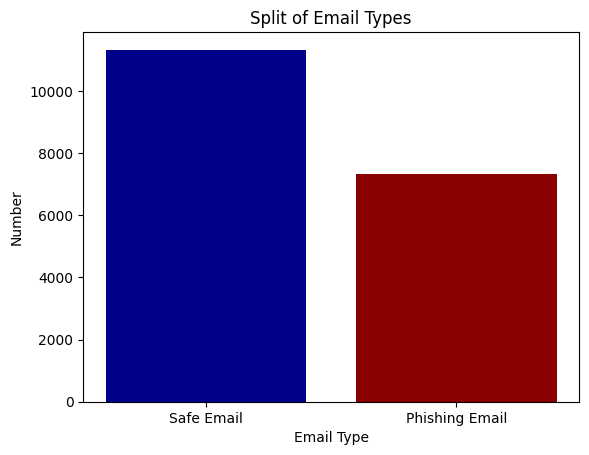

In [8]:
email_type = df['Email Type'].value_counts()
plt.bar(email_type.index, email_type.values, color=['darkblue', 'darkred'])
plt.xlabel('Email Type')
plt.ylabel('Number')
plt.title('Split of Email Types')

# Display the plot
plt.show()

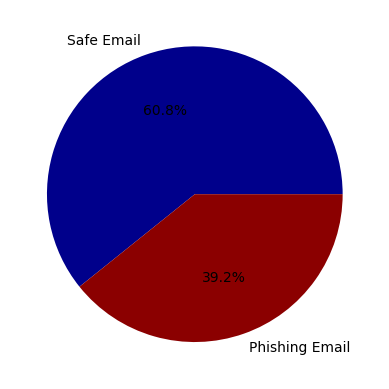

In [9]:
plt.pie(email_type, labels=email_type.index, colors=['darkblue', 'darkred'], autopct='%1.1f%%')

# Display the pie chart
plt.show()

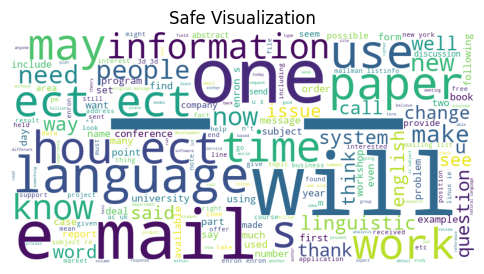

In [10]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
safe_type = df[df['Email Type'] == 'Safe Email']['Email Text'].astype(str).values
phishing_type = df[df['Email Type'] == 'Phishing Email']['Email Text'].astype(str).values

safe_type = ''.join(safe_type)
wordcloud.generate(safe_type)

plt.figure(figsize=(6, 7))
plt.imshow(wordcloud)
plt.title('Safe Visualization')
plt.axis("off")
plt.show()

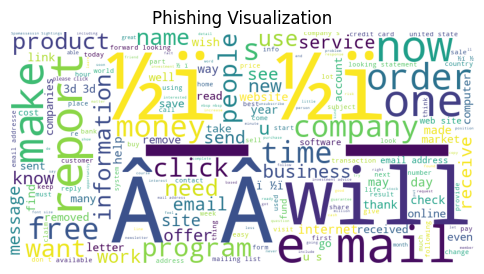

In [11]:
phishing_type = ''.join(phishing_type)
wordcloud.generate(phishing_type)

plt.figure(figsize=(6, 7))
plt.imshow(wordcloud)
plt.title('Phishing Visualization')
plt.axis("off")
plt.show()

In [12]:
# Vectorize email content using TF-IDF
tf = TfidfVectorizer(stop_words="english",max_features=10000)
feature_x = tf.fit_transform(df["Email Text"]).toarray()

y_tf = np.array(df['Email Type'])

# Split the dataset into training and test sets
X_train,X_test,y_train,y_test = train_test_split(feature_x,y_tf,train_size=0.8,random_state=0)

In [13]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Instances per label in training:", y_train_series.value_counts())
print("Instances per label in test:", y_test_series.value_counts())

Instances per label in training: Safe Email        9052
Phishing Email    5855
Name: count, dtype: int64
Instances per label in test: Safe Email        2270
Phishing Email    1457
Name: count, dtype: int64


In [14]:
print(X_train[:2])
print(X_train.shape)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.04338204 0.         0.         ... 0.         0.         0.        ]]
(14907, 10000)


In [15]:
print(y_train)
print(y_train.shape)

['Safe Email' 'Safe Email' 'Phishing Email' ... 'Safe Email'
 'Phishing Email' 'Phishing Email']
(14907,)


# Models

In [16]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

nb.fit(X_train,y_train)

MultinomialNB()

# Naive Bayes

In [17]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

# Predict the test set using Naive Bayes classifier
pred_nav = nb.predict(X_test)

# Print accuracy
print(f"Accuracy from Naive Bayes: {accuracy_score(y_test, pred_nav) * 100:.2f} %")

# For multi-class classification, use average='weighted' or 'macro'
print(f"F1 score from Naive Bayes: {f1_score(y_test, pred_nav, average='weighted') * 100:.2f} %")

# Print the classification report
print("Classification Report:\n", classification_report(y_test, pred_nav))


import pickle

# Saving the Naive Bayes model to 'model.pkl'
with open('model.pkl', 'wb') as model_file:
    pickle.dump(nb, model_file)  # nb is the trained Naive Bayes model

# Saving the TfidfVectorizer to 'vectorizer.pkl'
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tf, vectorizer_file)  # tf is the trained TfidfVectorizer


Accuracy from Naive Bayes: 95.12 %
F1 score from Naive Bayes: 95.09 %
Classification Report:
                 precision    recall  f1-score   support

Phishing Email       0.97      0.91      0.94      1457
    Safe Email       0.94      0.98      0.96      2270

      accuracy                           0.95      3727
     macro avg       0.95      0.94      0.95      3727
  weighted avg       0.95      0.95      0.95      3727



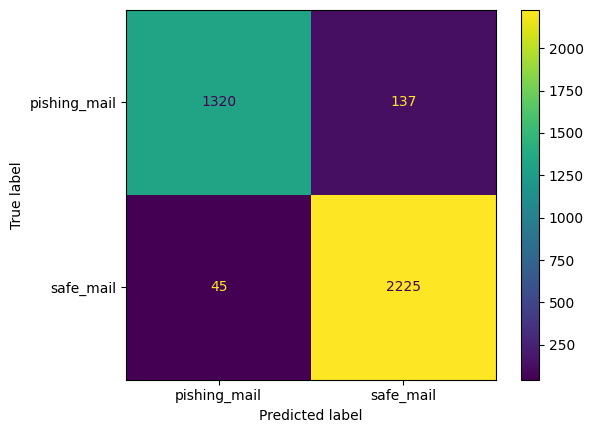

In [18]:
clf_nav = confusion_matrix(y_test,pred_nav)
cx_ = ConfusionMatrixDisplay(clf_nav,display_labels=['pishing_mail','safe_mail']).plot()
plt.show()

# Decision Tree

Accuracy from Decision Tree: 92.76 %
F1 score from Decision Tree: 92.79 %
Classification report:
                 precision    recall  f1-score   support

Phishing Email       0.89      0.93      0.91      1457
    Safe Email       0.96      0.92      0.94      2270

      accuracy                           0.93      3727
     macro avg       0.92      0.93      0.92      3727
  weighted avg       0.93      0.93      0.93      3727



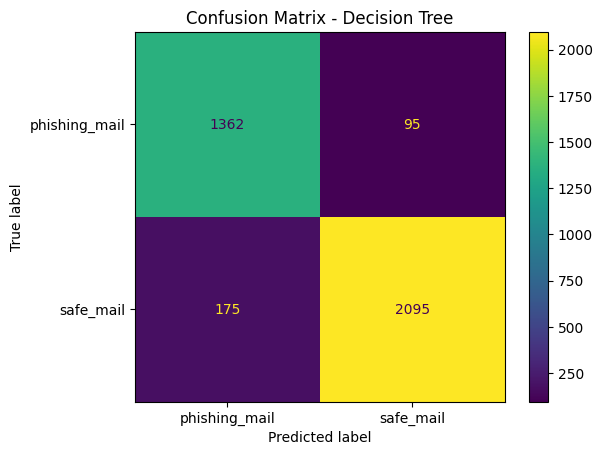

In [19]:
dtr = DecisionTreeClassifier()
dtr = DecisionTreeClassifier() # Creating the classifier object
dtr.fit(X_train, y_train)

#Prediction on the test set
pred_dtr = dtr.predict(X_test)

#Performance evaluation
print(f"Accuracy from Decision Tree: {accuracy_score(y_test, pred_dtr) * 100:.2f} %")
print(f"F1 score from Decision Tree: {f1_score(y_test, pred_dtr, average='weighted') * 100:.2f} %")
print("Classification report:\n", classification_report(y_test, pred_dtr))

#Confusion Matrix
clf_dtr = confusion_matrix(y_test, pred_dtr)
ConfusionMatrixDisplay(clf_dtr, display_labels=['phishing_mail', 'safe_mail']).plot()
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Random Forest

Accuracy from Random Forest: 96.46 %
F1 score from Fandom Forest: 96.47 %
Classification Report : 
                 precision    recall  f1-score   support

Phishing Email       0.94      0.98      0.96      1457
    Safe Email       0.98      0.96      0.97      2270

      accuracy                           0.96      3727
     macro avg       0.96      0.97      0.96      3727
  weighted avg       0.97      0.96      0.96      3727



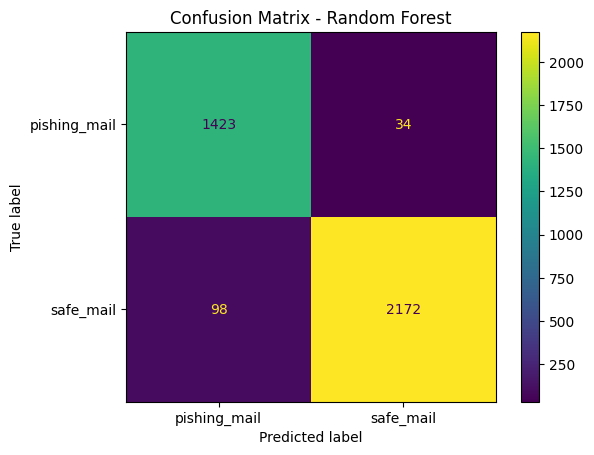

In [20]:
rnf = RandomForestClassifier() #passing object
rnf.fit(X_train,y_train)

#prediction
pred_rnf = rnf.predict(X_test)

#performance
print(f"Accuracy from Random Forest: {accuracy_score(y_test, pred_rnf) * 100:.2f} %")
print(f"F1 score from Fandom Forest: {f1_score(y_test, pred_rnf, average='weighted') * 100:.2f} %")
print("Classification Report : \n",classification_report(y_test, pred_rnf))

#confusion matrix
clf_rnf = confusion_matrix(y_test, pred_rnf)
ConfusionMatrixDisplay(clf_rnf, display_labels=['pishing_mail','safe_mail']).plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

# SGDClassifier

Accuracy from Logistic Regression: 97.16 %
F1 score from Logistic Regression: 97.16 %
Classification Report : 
                 precision    recall  f1-score   support

Phishing Email       0.95      0.98      0.96      1457
    Safe Email       0.99      0.97      0.98      2270

      accuracy                           0.97      3727
     macro avg       0.97      0.97      0.97      3727
  weighted avg       0.97      0.97      0.97      3727



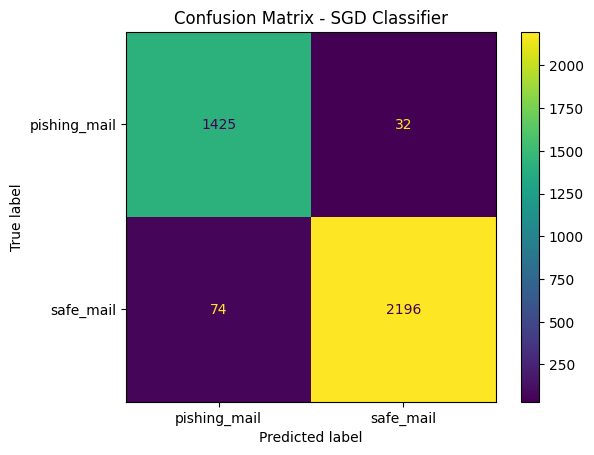

In [21]:
from sklearn.linear_model import SGDClassifier

# passing object
sgd = SGDClassifier()
sgd.fit(X_train,y_train)


pred_sgd = sgd.predict(X_test)
# performance
print(f"Accuracy from Logistic Regression: {accuracy_score(y_test, pred_sgd) * 100:.2f} %")
print(f"F1 score from Logistic Regression: {f1_score(y_test, pred_sgd, average='weighted') * 100:.2f} %")
print("Classification Report : \n", classification_report(y_test, pred_sgd))

clf_sgd = confusion_matrix(y_test,pred_sgd)
ConfusionMatrixDisplay(clf_sgd, display_labels=['pishing_mail','safe_mail']).plot()
plt.title("Confusion Matrix - SGD Classifier")
plt.show()

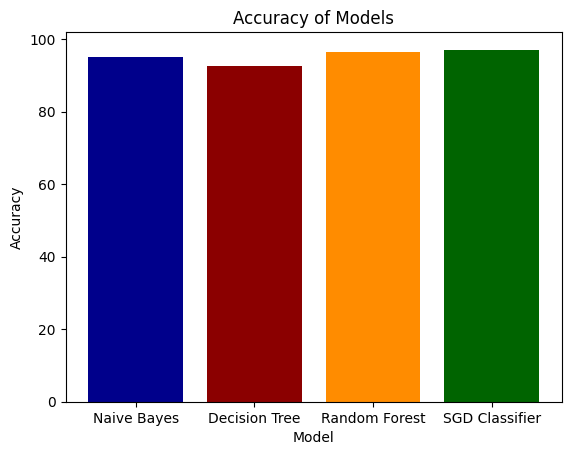

In [22]:
models = ['Naive Bayes', 'Decision Tree', 'Random Forest', 'SGD Classifier']
accuracies = [95.12, 92.70, 96.54, 97.10]

plt.bar(models, accuracies, color=['darkblue', 'darkred', 'darkorange', 'darkgreen'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')

# Display the plot
plt.show()

# LSTM / RNN

In [23]:
from tensorflow.keras.utils import pad_sequences

max_length = 150
tk = Tokenizer()

tk.fit_on_texts(df['Email Text'])
sequences = tk.texts_to_sequences(df['Email Text'])
vector = pad_sequences(sequences,padding='post', maxlen=max_length)
len(vector)


18634

In [24]:
x = np.array(vector)
y = np.array(df["Email Type"])

X_train, X_test, y_train, y_test = train_test_split(vector,df['Email Type'], test_size=0.2, random_state =0)

In [25]:
#LSTM

model = Sequential() # Sequential() API
model.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=50,input_length=150))
model.add(LSTM(units=100))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

model.summary()

c:\Users\gourob\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [27]:
historical  = model.fit(X_train,y_train, epochs=2, batch_size=16, validation_data=(X_test,y_test))

Epoch 1/2
932/932 ━━━━━━━━━━━━━━━━━━━━ 190s 195ms/step - accuracy: 0.6955 - loss: 0.5793 - val_accuracy: 0.7185 - val_loss: 0.5110
Epoch 2/2
932/932 ━━━━━━━━━━━━━━━━━━━━ 205s 198ms/step - accuracy: 0.8088 - loss: 0.4398 - val_accuracy: 0.9434 - val_loss: 0.1585


# Web Browser

In [1]:
from flask import Flask, request, render_template_string
import webbrowser
import threading
from werkzeug.serving import make_server
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Load your trained model (assuming you've saved it previously)
with open('model.pkl', 'rb') as model_file:
    phishing_model = pickle.load(model_file)

# Assuming you saved your TF-IDF vectorizer too
with open('vectorizer.pkl', 'rb') as vectorizer_file:
    tfidf_vectorizer = pickle.load(vectorizer_file)

# Flask app setup
app = Flask(__name__)

# HTML template for the form
html_code = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Phishing Email Detection</title>
    <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css">
    <style>
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            background-color: #f0f0f0;
            margin: 0;
            padding: 0;
        }
        .container {
            width: 70%;
            margin: 50px auto;
            background: #fff;
            padding: 20px;
            border-radius: 10px;
            box-shadow: 0 0 15px rgba(0, 0, 0, 0.1);
        }
        .form-group label {
            font-weight: bold;
        }
        button {
            padding: 12px;
            background-color: #28a745;
            color: white;
            border: none;
            border-radius: 5px;
            font-size: 16px;
            cursor: pointer;
        }
        button:hover {
            background-color: #218838;
        }
        .result {
            margin-top: 20px;
            padding: 20px;
            background-color: #d4edda;
            color: #155724;
            border: 1px solid #c3e6cb;
            border-radius: 5px;
        }
    </style>
</head>
<body>
    <div class="container mt-5">
        <h1 class="text-center">Phishing Email Detection</h1>
        <p class="text-center">Paste your email content below to check for phishing attempts.</p>
        <form action="/result" method="POST">
            <div class="form-group">
                <label for="email">Email Content:</label>
                <textarea class="form-control" id="email" name="email" rows="10" required></textarea>
            </div>
            <button type="submit" class="btn btn-primary btn-block">Check for Phishing</button>
        </form>
        {% if result %}
        <div class="result">
            <h3>Result: {{ result }}</h3>
        </div>
        {% endif %}
    </div>
</body>
</html>
'''

@app.route('/')
def phishing_form():
    return render_template_string(html_code)

@app.route('/result', methods=['POST'])
def phishing_result():
    email_content = request.form['email']

    # Vectorize the email content using the same vectorizer used during model training
    email_vector = tfidf_vectorizer.transform([email_content])

    # Predict the probability that it's phishing (0 = Safe, 1 = Phishing)
    prediction = phishing_model.predict_proba(email_vector)[:, 1]  # Probability of phishing email

    # Use a threshold to determine if it's phishing
    if prediction[0] >= 0.5:
        result = 'Yes, it is a safe email.'
    else:
        result = 'No, it is a phishing email.'

    # Return the result to the user via the same form
    return render_template_string(html_code, result=result)


# Background thread to open the app in the browser
def open_browser():
    webbrowser.open_new('http://127.0.0.1:5000/')

# Start Flask in the background
class ServerThread(threading.Thread):
    def __init__(self, app):
        threading.Thread.__init__(self)
        self.srv = make_server('127.0.0.1', 5000, app)
        self.ctx = app.app_context()
        self.ctx.push()

    def run(self):
        self.srv.serve_forever()

    def shutdown(self):
        self.srv.shutdown()

# Start the server
server = ServerThread(app)
server.start()

# Open the page in a browser
open_browser()


127.0.0.1 - - [07/Oct/2024 23:23:36] "GET / HTTP/1.1" 200 -
